In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [128]:
titanic_train = pd.read_csv('DATA/titanic_train.csv')
titanic_test = pd.read_csv('DATA/titanic_test.csv')
titanic = pd.concat([titanic_train, titanic_test], ignore_index=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [130]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


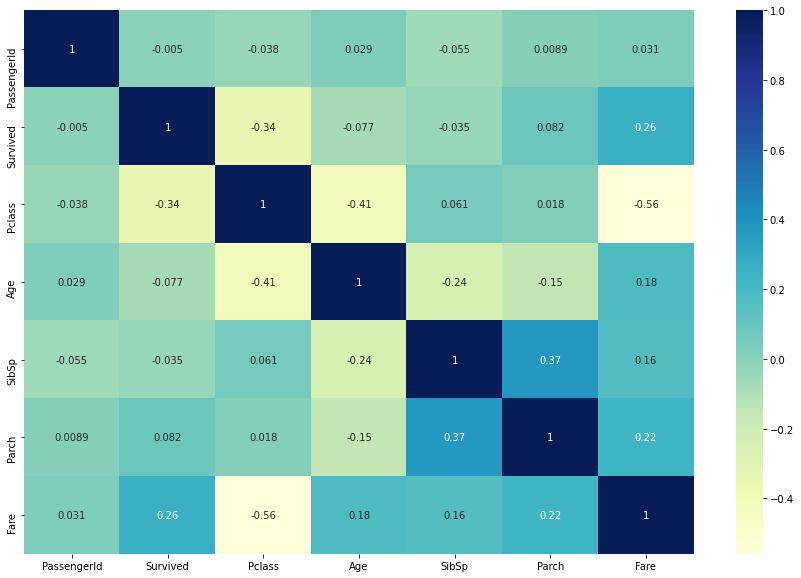

In [131]:
plt.figure(figsize=(15, 10))
sns.heatmap(titanic.corr(), annot=True, cmap='YlGnBu')

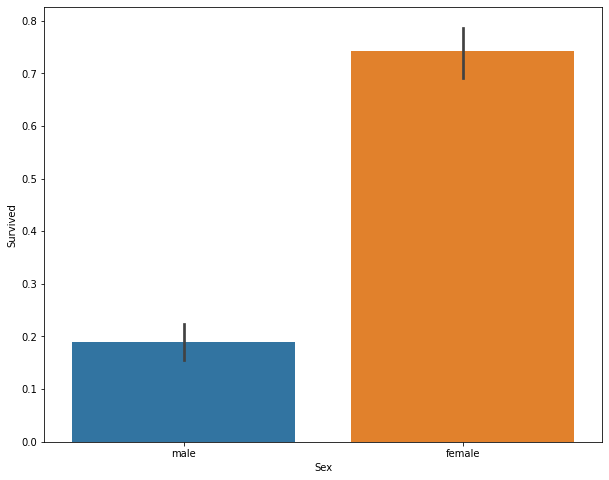

In [132]:
plt.figure(figsize=(10, 8))
sns.barplot('Sex', 'Survived', data=titanic)

In [133]:
titanic.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [134]:
titanic['Embarked'].fillna('S', inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)
titanic['FamSize'] = titanic['Parch'] + titanic['SibSp'] + 1
pd.Categorical(titanic['Embarked'])

[S, C, S, S, S, ..., S, C, S, S, C]
Length: 1309
Categories (3, object): [C, Q, S]

In [136]:
titanic['Name'].str.extract(r'(\w+)[.]').stack().unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [63]:
titanic['Title'] = titanic['Name'].str.extract(r'(\w+)[.]')
print(titanic[['Title', 'Survived']].groupby(['Title']).sum())
titanic['Title'].replace(['Mme', 'Mlle', 'Ms'], ['Mrs', 'Miss', 'Miss'], inplace=True)
titanic['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir'], 'Rare', inplace=True)
print(titanic[['Title', 'Survived']].groupby(['Title']).sum())

          Survived
Title             
Capt           0.0
Col            1.0
Countess       1.0
Don            0.0
Dona           0.0
Dr             3.0
Jonkheer       0.0
Lady           1.0
Major          1.0
Master        23.0
Miss         127.0
Mlle           2.0
Mme            1.0
Mr            81.0
Mrs           99.0
Ms             1.0
Rev            0.0
Sir            1.0
        Survived
Title           
Master      23.0
Miss       130.0
Mr          81.0
Mrs        100.0
Rare         8.0


In [67]:
# titanic = pd.concat([titanic, pd.get_dummies(titanic['Sex'], drop_first=True)], axis=1).drop('Sex', axis=1)
titanic = pd.concat([titanic, pd.get_dummies(titanic['Embarked'], drop_first=True)], axis=1).drop('Embarked', axis=1)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
title_mapping = {'Mr': 1, 'Mrs': 2, 'Rare': 3, 'Master': 4, 'Miss': 5}
titanic['Title'] = titanic['Title'].map(title_mapping)

In [68]:
titanic.drop(['Name', 'Ticket', 'Cabin', 'Parch', 'SibSp', ], axis=1, inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
FamSize          0
Title            0
Q                0
S                0
dtype: int64

In [73]:
titanic_train = titanic[:len(titanic_train)]
titanic_test = titanic[len(titanic_train):]
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamSize,Title,Q,S
0,1,0.0,3,0,22.0,7.2500,2,1,0,1
1,2,1.0,1,1,38.0,71.2833,2,2,0,0
2,3,1.0,3,1,26.0,7.9250,1,5,0,1
3,4,1.0,1,1,35.0,53.1000,2,2,0,1
4,5,0.0,3,0,35.0,8.0500,1,1,0,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop('Survived', axis=1), titanic_train['Survived'], test_size=0.4)

In [110]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

titanic_test_scale = scaler.transform(titanic_test.drop('Survived', axis=1))

In [76]:
X_train

,PassengerId,Pclass,Sex,Age,Fare,FamSize,Title,Q,S
563,564,3,0,29.881138,8.0500,1,1,0,1
693,694,3,0,25.000000,7.2250,1,1,0,0
408,409,3,0,21.000000,7.7750,1,1,0,1
189,190,3,0,36.000000,7.8958,1,1,0,1
813,814,3,1,6.000000,31.2750,7,5,0,1
...,...,...,...,...,...,...,...,...,...
691,692,3,1,4.000000,13.4167,2,5,0,0
764,765,3,0,16.000000,7.7750,1,1,0,1
555,556,1,0,62.000000,26.5500,1,1,0,1
856,857,1,1,45.000000,164.8667,3,2,0,1


In [77]:
def newModel(lambd):
    l2_regularizer = l2(l=lambd)
    model = Sequential()
    model.add(Dense(20, activation='relu', kernel_regularizer=l2_regularizer))
#     model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [78]:
# lambd = 10**(-2*np.random.rand(1, 5)[0])
# result = []
# for lam in lambd:
#     model = newModel(lam)
#     model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)   
#     result.append({'lambda': lam, 'loss': pd.DataFrame(model.history.history['loss']).iloc[-1][0]}) 

In [79]:
# smallest = 1
# for res in result:
#     if res['loss'] < smallest:
#         smallest = res['lambda']
#     print('lambda={}\tloss={}'.format(res['lambda'], res['loss']))

In [80]:
model = newModel(0.001)

In [81]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [82]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

534/534 [==============================] - 1s 2ms/step - loss: 4.9343 - accuracy: 0.4906 - val_loss: 1.4482 - val_accuracy: 0.4146
Epoch 2/100
534/534 [==============================] - 1s 1ms/step - loss: 1.3974 - accuracy: 0.5599 - val_loss: 0.8051 - val_accuracy: 0.6275
Epoch 3/100
534/534 [==============================] - 1s 1ms/step - loss: 1.2332 - accuracy: 0.6423 - val_loss: 1.3005 - val_accuracy: 0.6779
Epoch 4/100
534/534 [==============================] - 1s 1ms/step - loss: 1.17

534/534 [==============================] - 1s 1ms/step - loss: 0.6647 - accuracy: 0.7266 - val_loss: 0.6742 - val_accuracy: 0.7507
Epoch 54/100
534/534 [==============================] - 1s 1ms/step - loss: 0.6474 - accuracy: 0.7603 - val_loss: 0.5529 - val_accuracy: 0.7703
Epoch 55/100
534/534 [==============================] - 1s 1ms/step - loss: 0.6588 - accuracy: 0.7472 - val_loss: 0.5826 - val_accuracy: 0.7871
Epoch 56/100
534/534 [==============================] - 1s 1ms/step - loss: 0.6303 - accuracy: 0.7491 - val_loss: 0.5034 - val_accuracy: 0.7815
Epoch 57/100
534/534 [==============================] - 1s 1ms/step - loss: 0.6499 - accuracy: 0.7472 - val_loss: 0.6755 - val_accuracy: 0.7423
Epoch 58/100
534/534 [==============================] - 1s 1ms/step - loss: 0.6584 - accuracy: 0.7603 - val_loss: 0.5329 - val_accuracy: 0.7955
Epoch 59/100
534/534 [==============================] - 1s 1ms/step - loss: 0.6427 - accuracy: 0.7491 - val_loss: 0.5100 - val_accuracy: 0.7955
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


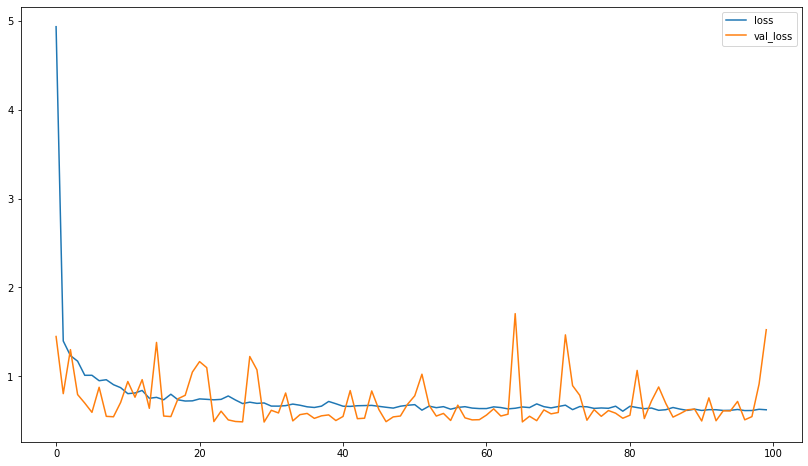

In [83]:
print(model.history.history.keys())
plt.figure(figsize=(14, 8))
# plt.plot(pd.DataFrame(model.history.history))
plt.plot(pd.DataFrame(model.history.history['loss']))
plt.plot(pd.DataFrame(model.history.history['val_loss']))
plt.legend(['loss', 'val_loss'])
plt.show()

In [84]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
17/17 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.7566 - val_loss: 0.5044 - val_accuracy: 0.7927
Epoch 2/300
17/17 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7846 - val_loss: 0.4930 - val_accuracy: 0.7843
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7828 - val_loss: 0.4837 - val_accuracy: 0.7871
Epoch 4/300
17/17 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7921 - val_loss: 0.4717 - val_accuracy: 0.7871
Epoch 5/300
17/17 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7828 - val_loss: 0.4895 - val_accuracy: 0.7955
Epoch 6/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7828 - val_loss: 0.4796 - val_accuracy: 0.8011
Epoch 7/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7903 - val_loss: 0.4865 - val_accuracy: 0.7983
Epoch 8/300
1

Epoch 59/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7753 - val_loss: 0.4863 - val_accuracy: 0.8011
Epoch 60/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7884 - val_loss: 0.4675 - val_accuracy: 0.8011
Epoch 61/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7772 - val_loss: 0.4676 - val_accuracy: 0.7927
Epoch 62/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7603 - val_loss: 0.5162 - val_accuracy: 0.7731
Epoch 63/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.7865 - val_loss: 0.4588 - val_accuracy: 0.7955
Epoch 64/300
17/17 [==============================] - 0s 4ms/step - loss: 0.4886 - accuracy: 0.7790 - val_loss: 0.4989 - val_accuracy: 0.7955
Epoch 65/300
17/17 [==============================] - ETA: 0s - loss: 0.5092 - accuracy: 0.71 - 0s 4ms/step - loss: 0.4816 - accuracy: 0.7959 - val_

17/17 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7753 - val_loss: 0.4693 - val_accuracy: 0.7955
Epoch 174/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7753 - val_loss: 0.4697 - val_accuracy: 0.7983
Epoch 175/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7790 - val_loss: 0.4599 - val_accuracy: 0.7955
Epoch 176/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7828 - val_loss: 0.4979 - val_accuracy: 0.8039
Epoch 177/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7884 - val_loss: 0.5944 - val_accuracy: 0.7675
Epoch 178/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7846 - val_loss: 0.5372 - val_accuracy: 0.7759
Epoch 179/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7884 - val_loss: 0.4833 - val_accuracy: 0.7787
Epoch 180/300

17/17 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7903 - val_loss: 0.4786 - val_accuracy: 0.7955
Epoch 288/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7828 - val_loss: 0.5012 - val_accuracy: 0.7955
Epoch 289/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7865 - val_loss: 0.4705 - val_accuracy: 0.7927
Epoch 290/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.8052 - val_loss: 0.4761 - val_accuracy: 0.8179
Epoch 291/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7959 - val_loss: 0.4646 - val_accuracy: 0.8039
Epoch 292/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7903 - val_loss: 0.7302 - val_accuracy: 0.6303
Epoch 293/300
17/17 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7865 - val_loss: 0.4644 - val_accuracy: 0.8151
Epoch 294/300

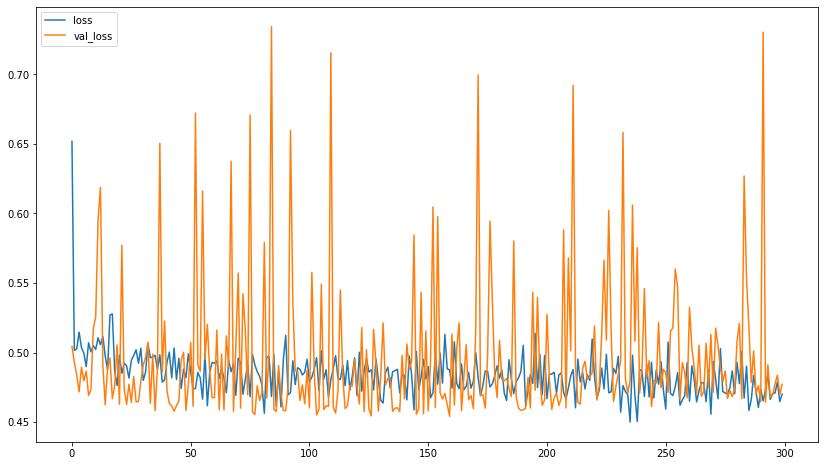

In [85]:
plt.figure(figsize=(14, 8))
plt.plot(pd.DataFrame(model.history.history['loss']))
plt.plot(pd.DataFrame(model.history.history['val_loss']))
plt.legend(['loss', 'val_loss'])
plt.show()

In [112]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train_scale, y_train)

pred = random_forest.predict(titanic_test_scale)
random_forest.score(X_test_scale, y_test)

0.8375350140056023

In [113]:
# titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# titanic_test['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
# titanic_test['Embarked'].replace(['C', 'S', 'Q'], [0, 1, 2], inplace=True)
# titanic_test['Age'].fillna(titanic_test['Age'].mean(skipna=True), inplace=True)
# titanic_test.dropna(inplace=True)
# titanic_test.info()
titanic_test.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
FamSize          0
Title            0
Q                0
S                0
dtype: int64

In [114]:
predictions = pd.DataFrame(titanic_test['PassengerId'])
predictions.reset_index(inplace=True, drop=True)
# predictions['Survived'] = (pd.DataFrame(model.predict(titanic_test.drop('Survived', axis=1)) > 0.5)).astype(int)[0]
# predictions.to_csv('predictions.csv', index=False)
# accuracy = pd.DataFrame(model.predict(titanic_train.drop('Survived', axis=1)) > 0.5).astype(int)[0] == titanic_train['Survived']
# accuracy.mean()
# predictions = pd.DataFrame(titanic_test['PassengerId'])
predictions['Survived'] = pd.DataFrame(pred)[0].map(int)
predictions.to_csv('predict_random.csv', index=False)

In [115]:
(pred == predictions['Survived']).mean()

1.0

In [116]:
logr = LogisticRegression(max_iter=300)
logr.fit(X_train_scale, y_train)
logr.score(X_test_scale, y_test)

0.803921568627451

In [117]:
support_vector = SVC()
support_vector.fit(X_train_scale, y_train)
support_vector.score(X_test_scale, y_test)

0.8403361344537815

In [118]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scale, y_train)
knn.score(X_test_scale, y_test)

0.8235294117647058

In [119]:
sgd = SGDClassifier()
sgd.fit(X_train_scale, y_train)
sgd.score(X_test_scale, y_test)

0.7955182072829131

In [120]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train_scale, y_train)
d_tree.score(X_test_scale, y_test)

0.7703081232492998